# Transfer Learning VGG16 and VGG 19 using Keras

Download the data from: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Resize all the images to this size
IMAGE_SIZE=[224,224]

train_path='Datasets/train'
valid_path='Datasets/test'

In [5]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 8s 0us/step


In [6]:
# Don't train exixting layers
for layer in vgg.layers:
    layer.trainable=False

In [11]:
# Useful for getting number of output classes
folders=glob('Datasets/train/*')

In [12]:
# Our layers, can be added more
x=Flatten()(vgg.output)

In [13]:
prediction=Dense(len(folders),activation='softmax')(x)

# Create a model object
model=Model(inputs=vgg.input,outputs=prediction)

In [14]:
# View the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [15]:
# Tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
# Use the image data generator to import the images from the dataset
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [17]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
# Make sure you provide the same target size as initiated for the image size
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [23]:
test_set=train_datagen.flow_from_directory(valid_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 624 images belonging to 2 classes.


In [24]:
# Fit the model
r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

<ipython-input-24-fb0e2be31c67>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/5
163/163 [==============================] - 1456s 9s/step - loss: 0.1716 - accuracy: 0.9285 - val_loss: 0.2722 - val_accuracy: 0.9038
Epoch 2/5
163/163 [==============================] - 1476s 9s/step - loss: 0.1176 - accuracy: 0.9536 - val_loss: 0.4168 - val_accuracy: 0.8670
Epoch 3/5
163/163 [==============================] - 1080s 7s/step - loss: 0.0961 - accuracy: 0.9617 - val_loss: 0.3791 - val_accuracy: 0.8750
Epoch 4/5
163/163 [==============================] - 1162s 7s/step - loss: 0.1351 - accuracy: 0.9498 - val_loss: 0.6595 - val_accuracy: 0.8429
Epoch 5/5
163/163 [==============================] - 1169s 7s/step - loss: 0.0839 - accuracy: 0.9686 - val_loss: 0.6425 - val_accuracy: 0.8397


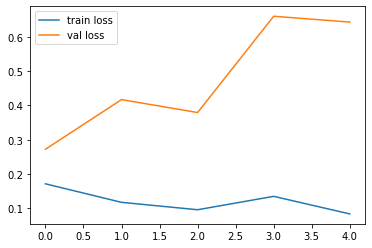

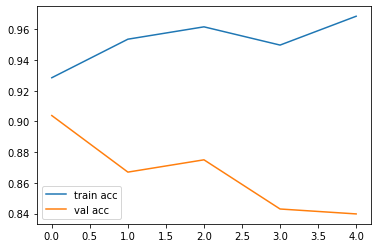

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

In [32]:
import tensorflow as tf
from keras.models import load_model
model.save('model_vgg16.h5')